<font color = Blue> Dataset description
Data set is taken from Kaggle

Url('https://www.kaggle.com/danielgrijalvas/movies')
  

Three decades of movie data (1986-2016), scraped from IMDb using Python.

<font color = Blue> Content
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

budget: the budget of a movie. Some movies don't have this, so it appears as 0

company: the production company

country: country of origin

director: the director

genre: main genre of the movie.

gross: revenue of the movie

name: name of the movie

rating: rating of the movie (R, PG, etc.)

released: release date (YYYY-MM-DD)

runtime: duration of the movie

score: IMDb user rating

votes: number of user votes

star: main actor/actress

writer: writer of the movie

year: year of release

In [163]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as figure
import matplotlib
plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize']=(12,8)

pd.options.mode.chained_assignment = None




import warnings
warnings.filterwarnings('ignore')

In [164]:
# read the Data

df = pd.read_csv('D:\Projects\movies.csv')

In [165]:
df.shape


(7668, 15)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [167]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [168]:
# checking for missing values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [169]:
df.isna().mean().round(3)*100

name         0.0
rating       1.0
genre        0.0
year         0.0
released     0.0
score        0.0
votes        0.0
director     0.0
writer       0.0
star         0.0
country      0.0
budget      28.3
gross        2.5
company      0.2
runtime      0.1
dtype: float64

In [170]:
#checking any duplicates

sum(df.duplicated())

0

<AxesSubplot:>

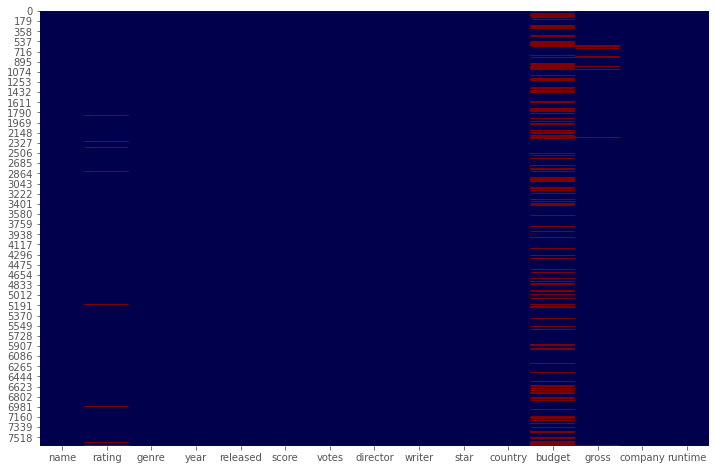

In [171]:
 #Visualizing missing data
cols = df.columns[:]
#colours = ['#9fff8c', '#fc0303'] # Red is missing. green is not missing.
sns.heatmap(df[cols].isnull(), cbar=False, cmap="seismic")

In [172]:
#pd.set_option('display.max_rows',None)

In [173]:
# replcaing missing value with "unknown" for the columns "rating,released,score,votes ,writer,star,country,company "

df.fillna({'rating':'unknown','released':'unknown','score':'unknown','votes':'unknown','writer':'unknown',
          'star':'unknown','country':'unknown','company':'unknown'},inplace =True)
df

name   rating      genre  \
0                                        The Shining        R      Drama   
1                                    The Blue Lagoon        R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back       PG     Action   
3                                          Airplane!       PG     Comedy   
4                                         Caddyshack        R     Comedy   
...                                              ...      ...        ...   
7663                                    More to Life  unknown      Drama   
7664                                     Dream Round  unknown     Comedy   
7665                                   Saving Mbango  unknown      Drama   
7666                                    It's Just Us  unknown      Drama   
7667                                       Tee em el  unknown     Horror   

      year                          released    score    votes  \
0     1980     June 13, 1980 (United States)      8.4   927000   
1     1980      July 2, 1980 (United States)      5.8    65000   
2     1980     June 20, 1980 (United States)      8.7  1.2e+06   
3     1980      July 2, 1980 (United States)      7.7   221000   
4     1980     July 25, 1980 (United States)      7.3   108000   
...    ...                               ...      ...      ...   
7663  2020  October 23, 2020 (United States)      3.1       18   
7664  2020  February 7, 2020 (United States)      4.7       36   
7665  2020         April 27, 2020 (Cameroon)      5.7       29   
7666  2020   October 1, 2020 (United States)  unknown  unknown   
7667  2020   August 19, 2020 (United States)      5.7        7   

             director                   writer              star  \
0     Stanley Kubrick             Stephen King    Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole    Brooke Shields   
2      Irvin Kershner           Leigh Brackett       Mark Hamill   
3        Jim Abrahams             Jim Abrahams       Robert Hays   
4        Harold Ramis       Brian Doyle-Murray       Chevy Chase   
...               ...                      ...               ...   
7663    Joseph Ebanks            Joseph Ebanks      Shannon Bond   
7664     Dusty Dukatz              Lisa Huston  Michael Saquella   
7665     Nkanya Nkwai             Lynno Lovert      Onyama Laura   
7666    James Randall            James Randall     Christina Roz   
7667     Pereko Mosia             Pereko Mosia  Siyabonga Mabaso   

             country      budget        gross                    company  \
0     United Kingdom  19000000.0   46998772.0               Warner Bros.   
1      United States   4500000.0   58853106.0          Columbia Pictures   
2      United States  18000000.0  538375067.0                  Lucasfilm   
3      United States   3500000.0   83453539.0         Paramount Pictures   
4      United States   6000000.0   39846344.0             Orion Pictures   
...              ...         ...          ...                        ...   
7663   United States      7000.0          NaN                    unknown   
7664   United States         NaN          NaN  Cactus Blue Entertainment   
7665   United States     58750.0          NaN           Embi Productions   
7666   United States     15000.0          NaN                    unknown   
7667    South Africa         NaN          NaN                PK 65 Films   

      runtime  
0       146.0  
1       104.0  
2       124.0  
3        88.0  
4        98.0  
...       ...  
7663     90.0  
7664     90.0  
7665      NaN  
7666    120.0  
7667    102.0  

[7668 rows x 15 columns]

In [174]:
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2171
gross        189
company        0
runtime        4
dtype: int64

<AxesSubplot:>

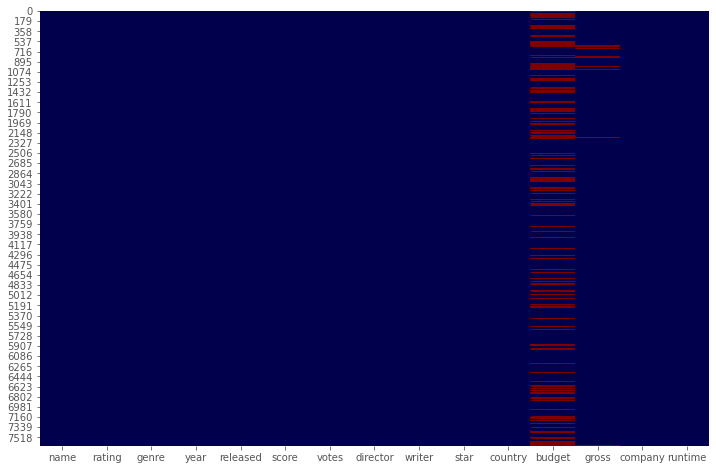

In [175]:
# # As the percentage of missing for "rating", "gross", "company", "runtime" is less than 3% so dropping 
# #the rows with null values 
# #df_less_missing = df.dropna(subset=['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
#        'director', 'writer', 'star', 'country', 'gross', 'company',
#        'runtime'])
# #Visualizing missing data with dropped null values
 #Visualizing missing data
cols = df.columns[:]
#colours = ['#9fff8c', '#fc0303'] # Red is missing. green is not missing.
sns.heatmap(df[cols].isnull(), cbar=False, cmap="seismic")

In [177]:
# remove all the rows with missing values for "Runtime"

df = df.dropna(subset=['runtime'])


In [178]:
# creat a separate dataframe removing the null values rows from "budget" and "Gross"
df1 = df.dropna(subset=['budget','gross'])

In [179]:
df1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [229]:
df1['budget']=df1['budget'].astype('int64')
df1['gross']=df1['gross'].astype('int64')
df1['runtime']=df1['runtime'].astype('int64')
df1['score']=df1['score'].astype('int64')
df1['votes']=df1['votes'].astype('int64')
df1['genre']=df1['genre'].astype('str')

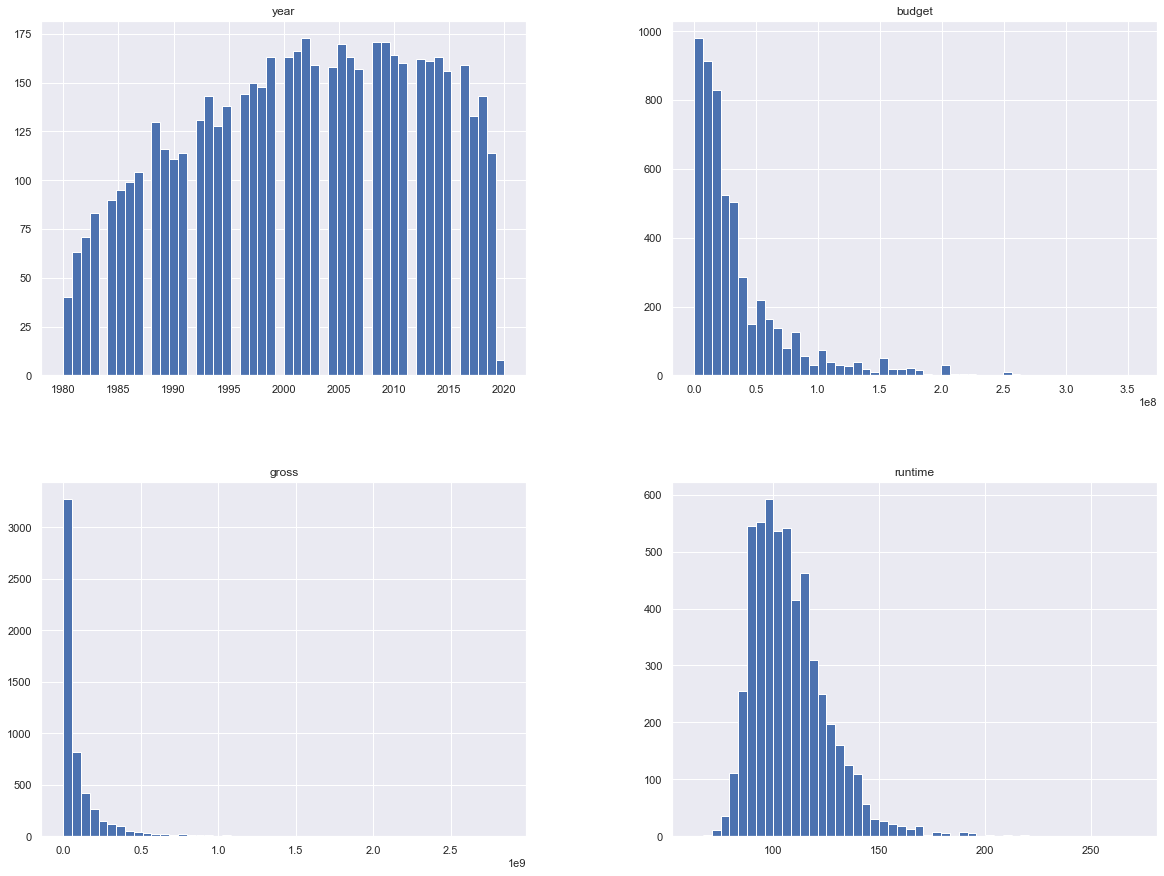

In [215]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histograms_plots")
plt.show()

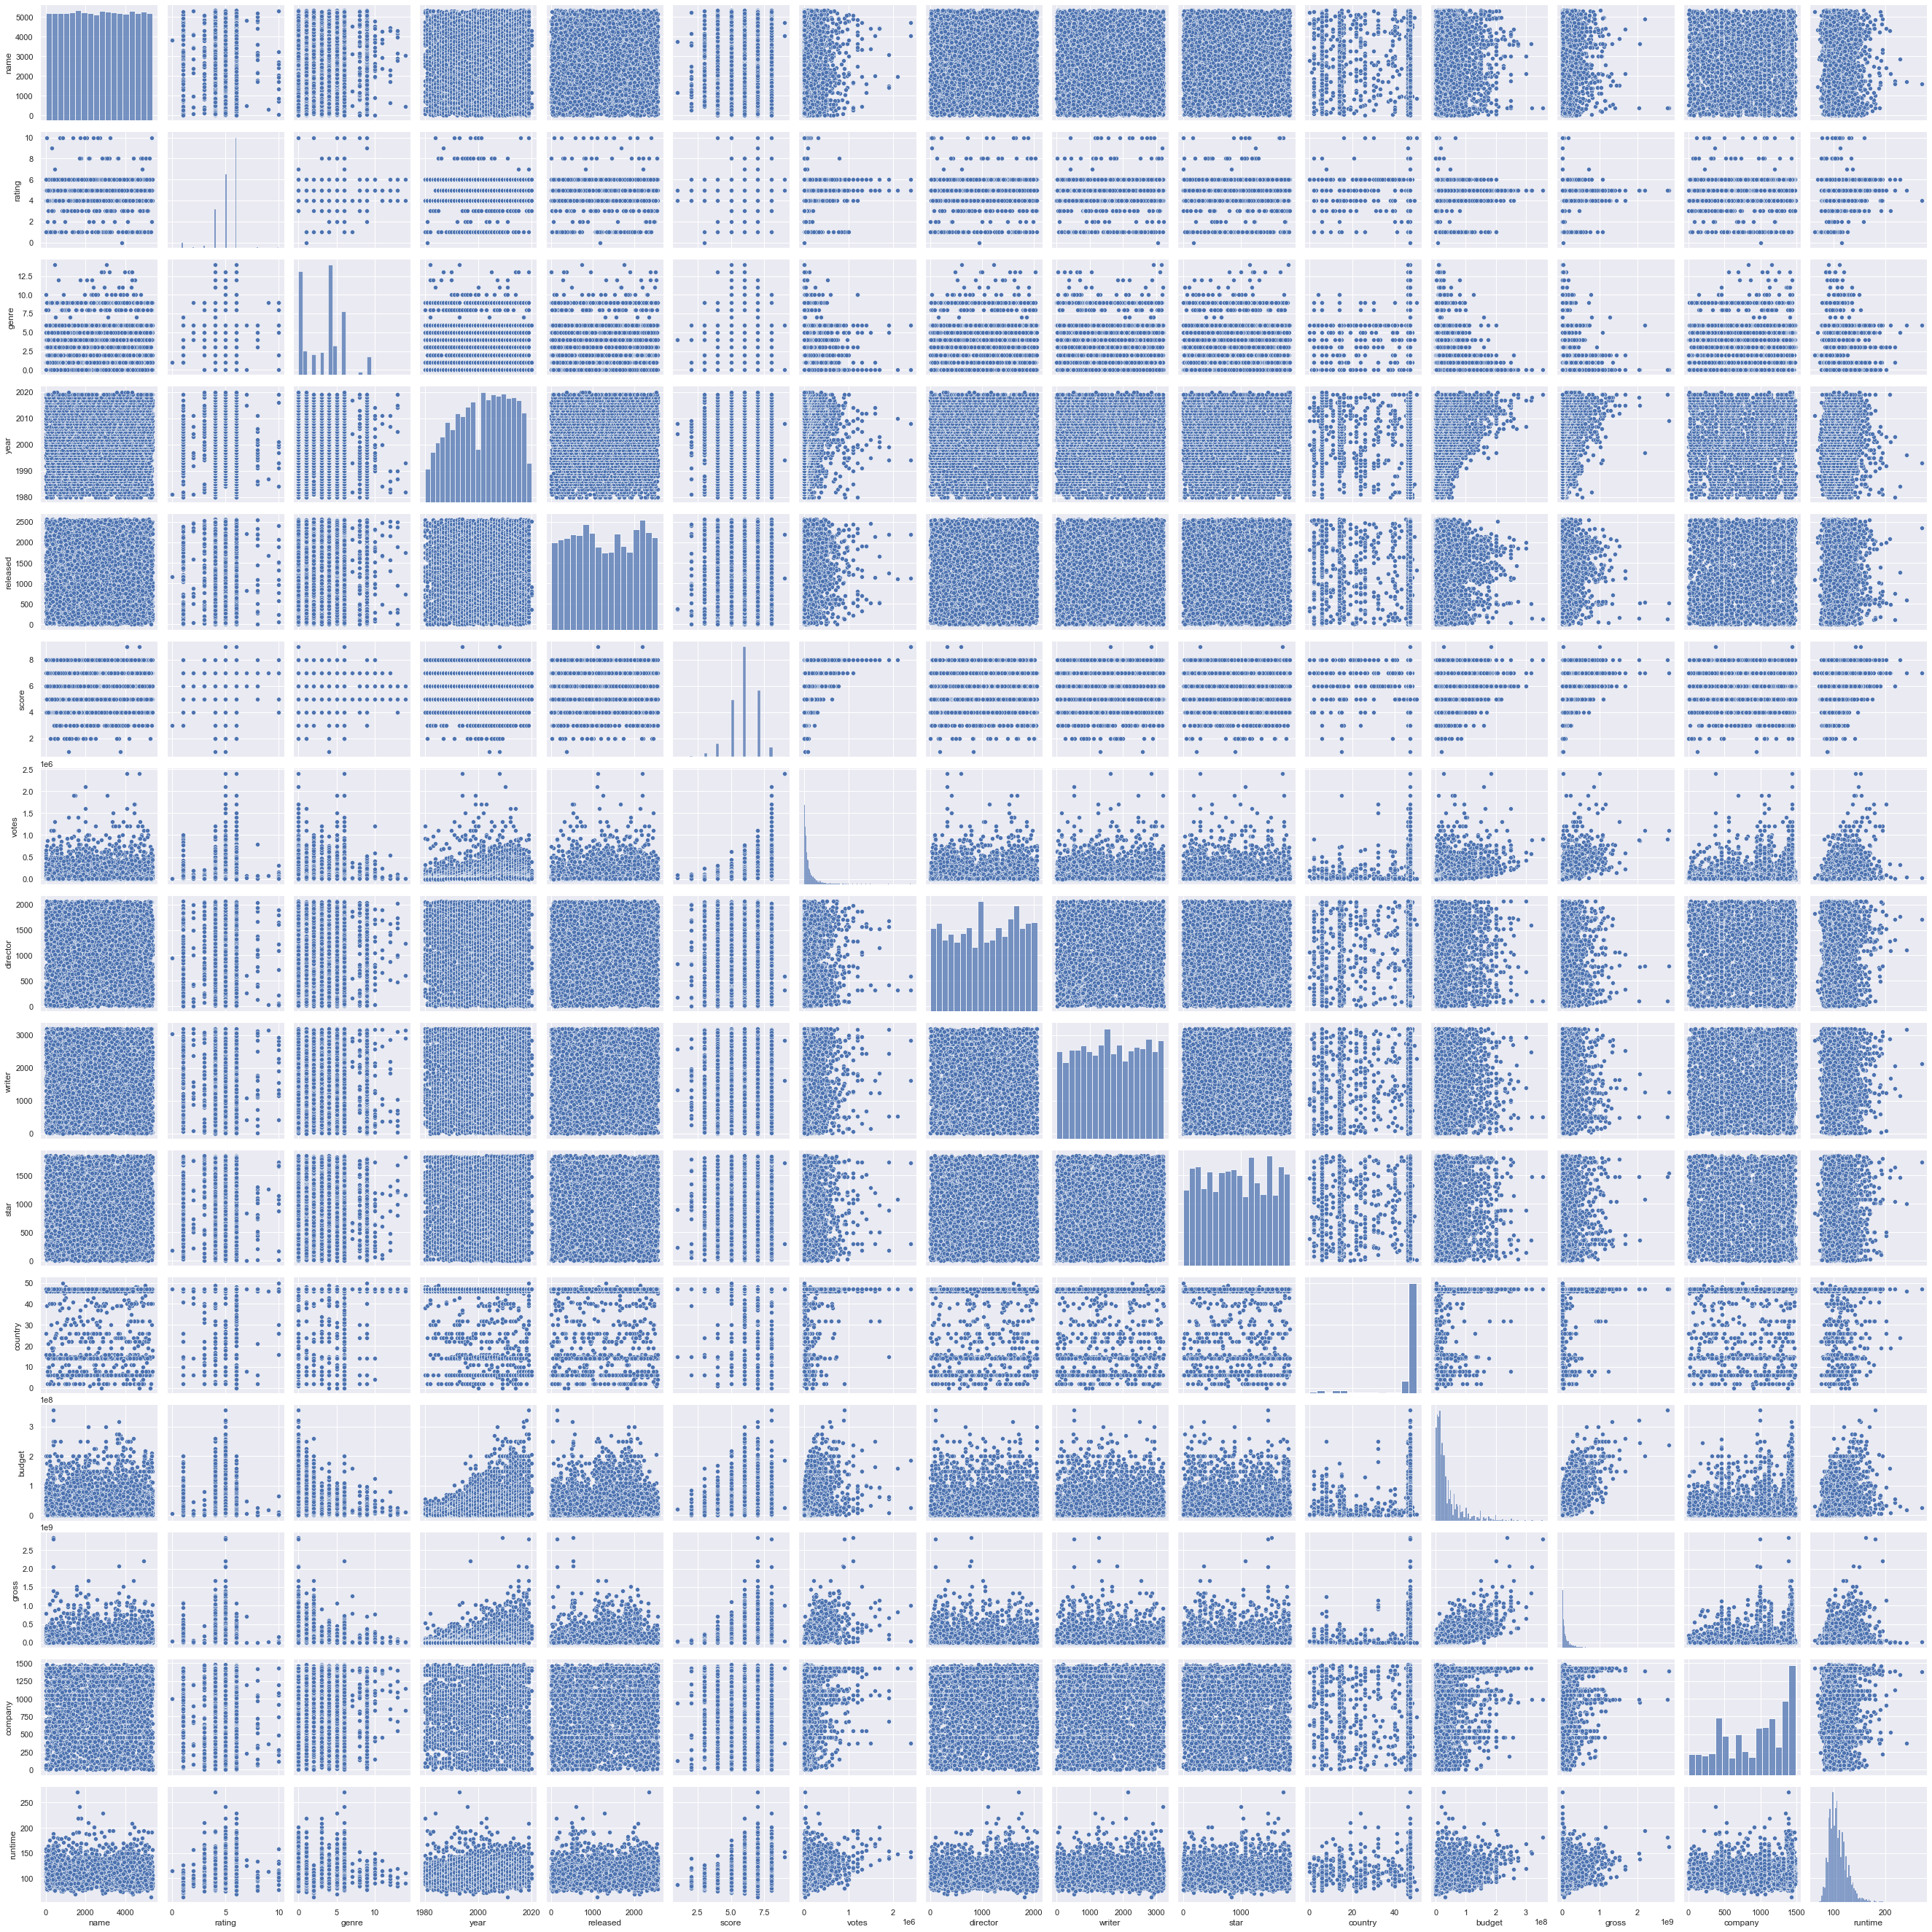

In [220]:
sns.pairplot(df1)

Text(0.5, 1.0, 'budget vs gross Earnings')

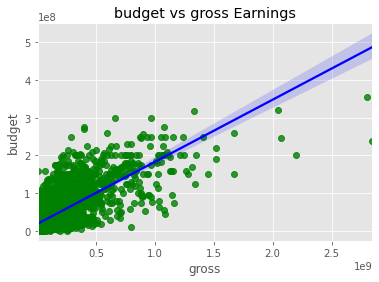

In [183]:
sns.regplot(x="gross", y="budget", data=df1,scatter_kws ={"color":"Green"},line_kws={"color":"blue"})
plt.title("budget vs gross Earnings")

In [193]:
df1.dtypes


name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [217]:
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi',
       'Romance', 'Thriller', 'Mystery'], dtype=object)

In [192]:
df1.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.055773  0.205852  0.327793  0.274354  0.074203
score    0.055773  1.000000  0.455285  0.066064  0.211406  0.395427
votes    0.205852  0.455285  1.000000  0.440035  0.614895  0.352437
budget   0.327793  0.066064  0.440035  1.000000  0.740410  0.318595
gross    0.274354  0.211406  0.614895  0.740410  1.000000  0.275596
runtime  0.074203  0.395427  0.352437  0.318595  0.275596  1.000000

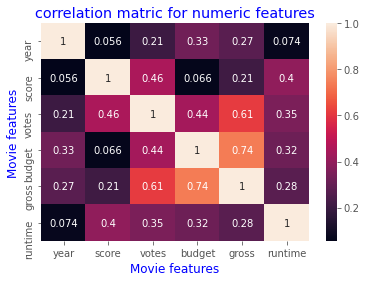

In [203]:
correlation_matrix =df1.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("correlation matric for numeric features",color='Blue')
plt.xlabel('Movie features',color='blue')
plt.ylabel('Movie features',color='blue')
plt.show()

In [205]:
df1_numerized =df1

for col_name in df1_numerized.columns:
    if(df1_numerized[col_name].dtype == 'object'):
        df1_numerized[col_name]=df1_numerized[col_name].astype('category')
        df1_numerized[col_name]=df1_numerized[col_name].cat.codes
df1_numerized

name  rating  genre  year  released  score    votes  director  writer  \
0     4705       6      6  1980      1308      8   927000      1800    2840   
1     3942       6      1  1980      1131      5    65000      1581    1160   
2     3653       4      0  1980      1363      8  1200000       759    1822   
3      205       4      4  1980      1131      7   221000       891    1416   
4      734       6      4  1980      1174      7   108000       721     352   
...    ...     ...    ...   ...       ...    ...      ...       ...     ...   
7648   416       6      0  2020       907      6   140000        17    2397   
7649  3568       4      0  2020       715      6   102000       854    2316   
7650  1156       4      1  2020       907      5    53000      1814    2835   
7651  3991       4      1  2020       760      6    42000       296    2096   
7652  4103       3      0  2020       371      6     3700       748    1186   

      star  country     budget      gross  company  runtime  
0      700       46   19000000   46998772     1432      146  
1      215       47    4500000   58853106      454      104  
2     1161       47   18000000  538375067      949      124  
3     1478       47    3500000   83453539     1114       88  
4      272       47    6000000   39846344     1089       98  
...    ...      ...        ...        ...      ...      ...  
7648  1819       47   90000000  426505244      454      124  
7649   148       47   85000000  319715683     1114       99  
7650  1474       47  175000000  245487753     1403      101  
7651   641        6  135000000  111105497       12      100  
7652  1846        8   80000000  461421559      229      149  

[5435 rows x 15 columns]

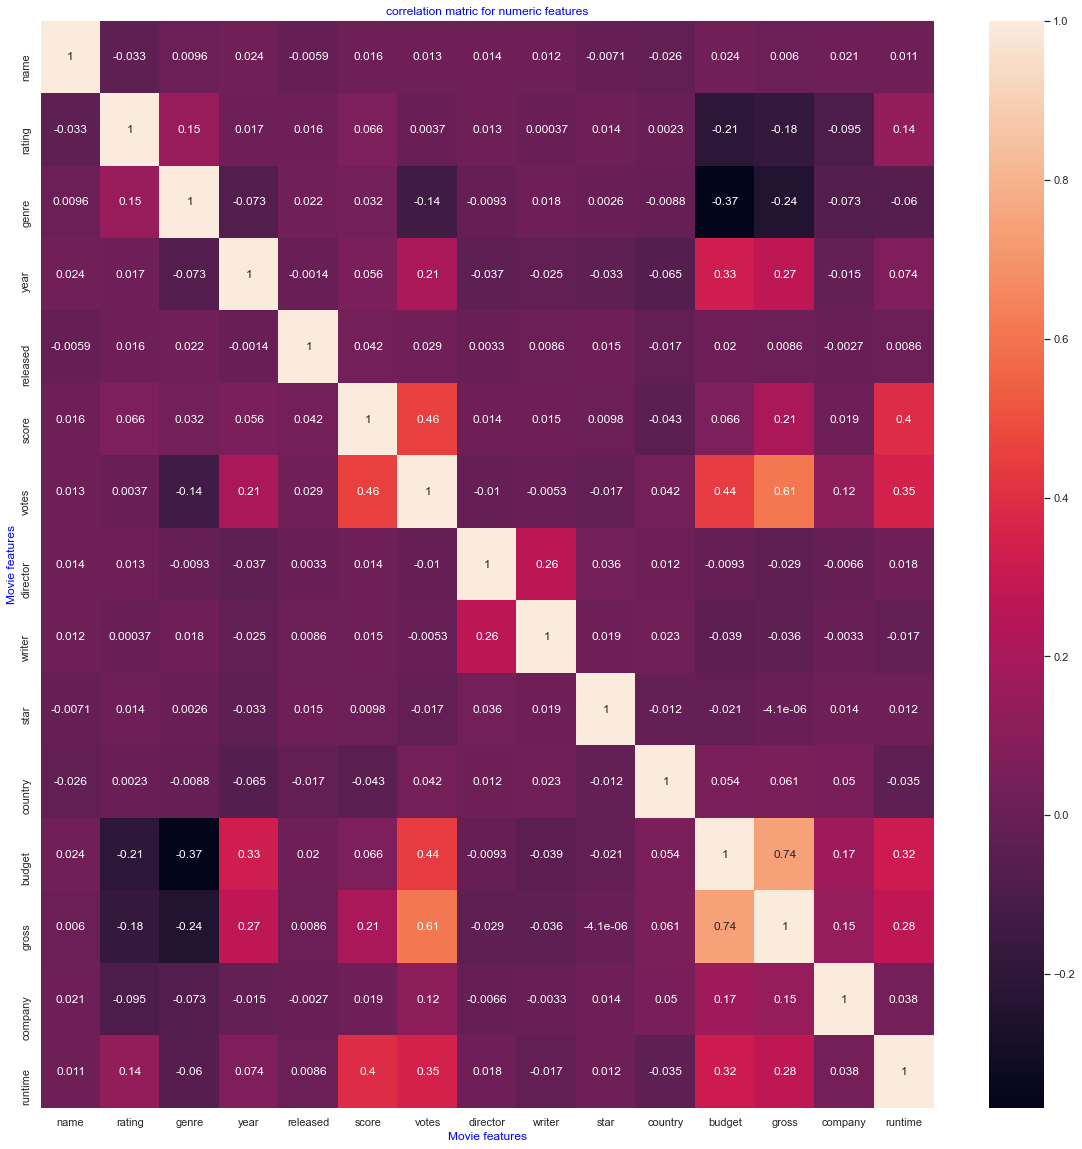

In [208]:

sns.set(rc={'figure.figsize':(20,20)})
correlation_matrix =df1_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("correlation matric for numeric features",color='Blue')
plt.xlabel('Movie features',color='blue')
plt.ylabel('Movie features',color='blue')
plt.show()

In [209]:
df1_numerized.corr()


name    rating     genre      year  released     score  \
name      1.000000 -0.032513  0.009647  0.024418 -0.005889  0.015787   
rating   -0.032513  1.000000  0.154094  0.016971  0.016301  0.065936   
genre     0.009647  0.154094  1.000000 -0.072815  0.021617  0.032435   
year      0.024418  0.016971 -0.072815  1.000000 -0.001405  0.055773   
released -0.005889  0.016301  0.021617 -0.001405  1.000000  0.041793   
score     0.015787  0.065936  0.032435  0.055773  0.041793  1.000000   
votes     0.012923  0.003662 -0.136573  0.205852  0.028998  0.455285   
director  0.013698  0.013175 -0.009300 -0.036942  0.003342  0.013571   
writer    0.011576  0.000375  0.017790 -0.024794  0.008619  0.014815   
star     -0.007111  0.013740  0.002638 -0.032788  0.015370  0.009817   
country  -0.025662  0.002323 -0.008830 -0.065350 -0.017198 -0.042923   
budget    0.023695 -0.205148 -0.368932  0.327793  0.019896  0.066064   
gross     0.005973 -0.181557 -0.244499  0.274354  0.008587  0.211406   
company   0.021354 -0.094763 -0.072777 -0.014893 -0.002710  0.018738   
runtime   0.010801  0.138762 -0.060186  0.074203  0.008619  0.395427   

             votes  director    writer      star   country    budget  \
name      0.012923  0.013698  0.011576 -0.007111 -0.025662  0.023695   
rating    0.003662  0.013175  0.000375  0.013740  0.002323 -0.205148   
genre    -0.136573 -0.009300  0.017790  0.002638 -0.008830 -0.368932   
year      0.205852 -0.036942 -0.024794 -0.032788 -0.065350  0.327793   
released  0.028998  0.003342  0.008619  0.015370 -0.017198  0.019896   
score     0.455285  0.013571  0.014815  0.009817 -0.042923  0.066064   
votes     1.000000 -0.010196 -0.005301 -0.017134  0.041687  0.440035   
director -0.010196  1.000000  0.262973  0.036289  0.011941 -0.009341   
writer   -0.005301  0.262973  1.000000  0.019255  0.022752 -0.039448   
star     -0.017134  0.036289  0.019255  1.000000 -0.011714 -0.021283   
country   0.041687  0.011941  0.022752 -0.011714  1.000000  0.053727   
budget    0.440035 -0.009341 -0.039448 -0.021283  0.053727  1.000000   
gross     0.614895 -0.029365 -0.035920 -0.000004  0.060555  0.740410   
company   0.118639 -0.006562 -0.003315  0.013652  0.049748  0.170501   
runtime   0.352437  0.018082 -0.016671  0.012439 -0.035167  0.318595   

             gross   company   runtime  
name      0.005973  0.021354  0.010801  
rating   -0.181557 -0.094763  0.138762  
genre    -0.244499 -0.072777 -0.060186  
year      0.274354 -0.014893  0.074203  
released  0.008587 -0.002710  0.008619  
score     0.211406  0.018738  0.395427  
votes     0.614895  0.118639  0.352437  
director -0.029365 -0.006562  0.018082  
writer   -0.035920 -0.003315 -0.016671  
star     -0.000004  0.013652  0.012439  
country   0.060555  0.049748 -0.035167  
budget    0.740410  0.170501  0.318595  
gross     1.000000  0.149625  0.275596  
company   0.149625  1.000000  0.038375  
runtime   0.275596  0.038375  1.000000

In [211]:
correlation_mat =df1_numerized.corr()
corr_pairs =correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.032513
         genre       0.009647
         year        0.024418
         released   -0.005889
                       ...   
runtime  country    -0.035167
         budget      0.318595
         gross       0.275596
         company     0.038375
         runtime     1.000000
Length: 225, dtype: float64

In [212]:
sorted_pairs =corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368932
genre    budget    -0.368932
gross    genre     -0.244499
genre    gross     -0.244499
rating   budget    -0.205148
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [213]:
High_corr =sorted_pairs[(sorted_pairs)>0.5]
High_corr

gross     votes       0.614895
votes     gross       0.614895
gross     budget      0.740410
budget    gross       0.740410
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# <font color = blue> votes and budget have the high correlation to gross earnings